<a id="0"></a> <br>
 # Table of Contents  
1. [What sells a car?](#1)     
    1. [Initialization](#7)     
    1. [Load data](#9)     
    1. [Explore initial data](#10)     
    1. [Early conclusion](#11) 
    1. [Conclusions and further steps](#11)
1. [Treat missing values (if any)](#12)       
1. [Fix data types](#12)   
1. [Enrich data](#12)   
1. [Check clean data](#12)   
1. [Study core parameters](#12)   
1. [Study and treat outliers](#12)   
1. [Study core parameters without outliers](#12)   
1. [Ads lifetime](#12)   
1. [Average price per each type of vehicle](#12)   
1. [Price factors](#12)   
1. [General conclusion](#12)   

# What sells a car? 

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load data

In [2]:
# Load the data file into a DataFrame
car_list = pd.read_csv('/datasets/vehicles_us.csv')

car_list


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [3]:

num_rows, num_columns = car_list.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 51525
Number of columns: 13


In [4]:
# print the general/summary information about the DataFrame

car_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# print a sample of data

N = 10 

car_list.head(N)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Early Conclusion

**There was an error in model_year, cylinder, odometer, paint_color, and is_4wd**

In [6]:
# Count the number of missing values in each row
missing_values_count = car_list.isnull().sum(axis=1)

# Get the unique counts and their frequencies
count_distribution = missing_values_count.value_counts()

print("Distribution of missing values counts in rows:")
print(count_distribution)

Distribution of missing values counts in rows:
1    23771
0    14852
2    10674
3     2044
4      180
5        4
dtype: int64


In [7]:
#percentage of missing values compared to the whole dataset

total_missing_values = car_list.isnull().sum().sum()
total_entries = car_list.size
percentage_missing = (total_missing_values / total_entries) * 100
rounded_percentage_missing = round(percentage_missing, 2)
print("Percentage of missing values in the whole dataset:", rounded_percentage_missing)

Percentage of missing values in the whole dataset: 7.76


In [8]:
# Check for missing values in each column
missing_values_per_column = car_list.isnull().sum()

# Sort the missing values in descending order
missing_values_sorted = missing_values_per_column.sort_values(ascending=False)

print("Missing values per column (sorted):")
print(missing_values_sorted)


Missing values per column (sorted):
is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64


**The most common missing value is 'is_4wd' while the least error was model_year.**

### Conclusions and further steps


Some of the data needed for transformation (i.e., 'is_4wd') since there was wrongly labelled. Others may needed to be dropped or replacing with median/mean.

## Treat missing values (if any)

In [9]:
car_list.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [10]:
# Create a new DataFrame copy with rows containing missing values in 'model_year', 'cylinders','odometer', 'paint_color', 'is_4wd'
df_na = car_list[car_list[['model_year', 'cylinders','odometer', 'paint_color', 'is_4wd']].isnull().any(axis=1)].copy()

# Printing the new DataFrame containing rows with missing values
print("DataFrame containing rows with missing values:")
df_na


DataFrame containing rows with missing values:


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [11]:
# Checking the distribution of numerical columns using .describe()
numerical_columns = ['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed']

numerical_stats = car_list[numerical_columns].describe()

print("Distribution of Numerical Columns:")
numerical_stats

Distribution of Numerical Columns:


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [12]:
df_na['price'].value_counts(normalize = True) * 100

6995     1.584272
4995     1.439751
5995     1.434298
3500     1.349767
5500     1.303411
           ...   
18875    0.002727
2483     0.002727
19949    0.002727
8470     0.002727
26809    0.002727
Name: price, Length: 2800, dtype: float64

In [13]:
df_na['model_year'].value_counts(normalize = True) * 100

2012.0    7.599685
2013.0    7.584559
2014.0    7.215466
2015.0    6.773764
2011.0    6.716282
            ...   
1948.0    0.003025
1961.0    0.003025
1936.0    0.003025
1949.0    0.003025
1955.0    0.003025
Name: model_year, Length: 68, dtype: float64

In [14]:
df_na['cylinders'].value_counts(normalize = True) * 100

4.0     38.051125
6.0     33.120046
8.0     27.160730
10.0     0.856333
5.0      0.716264
3.0      0.092318
12.0     0.003183
Name: cylinders, dtype: float64

In [15]:
df_na['odometer'].value_counts(normalize = True) * 100

0.0         0.521177
130000.0    0.465585
140000.0    0.455161
120000.0    0.420416
200000.0    0.409993
              ...   
144897.0    0.003475
95021.0     0.003475
136803.0    0.003475
317173.0    0.003475
167772.0    0.003475
Name: odometer, Length: 12961, dtype: float64

In [16]:
df_na['paint_color'].value_counts(normalize = True) * 100

white     22.706707
black     17.521711
silver    15.803109
grey      12.489966
blue      11.012187
red       10.453915
green      2.988397
brown      2.893527
custom     2.663650
yellow     0.748011
orange     0.467051
purple     0.251770
Name: paint_color, dtype: float64

In [17]:
df_na['days_listed'].value_counts(normalize = True) * 100

18     1.895127
20     1.886947
19     1.873313
22     1.854225
15     1.816050
         ...   
207    0.002727
199    0.002727
261    0.002727
185    0.002727
223    0.002727
Name: days_listed, Length: 216, dtype: float64

In [18]:
df_na['condition'].value_counts(normalize = True) * 100

excellent    47.230933
good         39.792218
like new      9.306574
fair          3.146729
new           0.267227
salvage       0.256319
Name: condition, dtype: float64

In [19]:
# Check unique values in the 'paint_color' column
unique_paint_colors = car_list['paint_color'].unique()

# Convert to a list and print the unique paint colors
unique_paint_colors_list = unique_paint_colors.tolist()
print(unique_paint_colors_list)

[nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom', 'orange', 'yellow', 'brown', 'green', 'purple']


In [20]:
# Convert 'paint_color' column to string type
car_list['paint_color'] = car_list['paint_color'].astype(str).str.strip()

# Replace 'nan' with 'n/a' in the 'paint_color' column
car_list['paint_color'] = car_list['paint_color'].replace('nan', 'n/a', regex=True)

# Map categorical paint_color values to numerical values
paint_color_mapping = {
    'white': 5, 'black': 4, 'silver': 3, 'grey': 2, 'blue': 1, 'red': 0,
    'custom': 6, 'orange': 7, 'yellow': 8, 'brown': 9, 'green': 10, 'purple': 11
}
car_list['paint_color_num'] = car_list['paint_color'].apply(lambda x: paint_color_mapping.get(x, x))

# Print the resulting DataFrame
display(car_list)



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,n/a,1.0,2018-06-23,19,n/a
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,5
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,n/a,NaN,2019-03-22,9,n/a
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37,4
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22,5
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32,1
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71,4


**The reason for catagorizing a paint color is because:**

>Visualization: Categorizing colors can make it easier to visualize and interpret data. It's often easier to work with a few color categories than with numerous unique color names.

>Pattern Recognition: Grouping similar colors together can help in identifying patterns or trends.

In [21]:
# Change NA values to False in the 'is_4wd' column
car_list['is_4wd'] = car_list['is_4wd'].fillna(False)

# Print the unique 'is_4wd' values after filling NA with False
unique_is_4wd = car_list['is_4wd'].unique()
print(unique_is_4wd)
print()
display(car_list)

[1.0 False]



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,n/a,1.0,2018-06-23,19,n/a
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,5
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,n/a,False,2019-03-22,9,n/a
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,4
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,5
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,1
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,4


In [22]:

# Fill missing model_year values based on median model_year for each model
model_year_by_model = car_list.groupby('model')['model_year'].transform('median')
car_list['model_year'].fillna(model_year_by_model, inplace=True)
car_list['model_year'] = car_list['model_year'].astype(int)  # Convert to integers

# Fill missing odometer values based on median odometer for each model year
odometer_by_year = car_list.groupby('model_year')['odometer'].transform('median')
car_list['odometer'].fillna(odometer_by_year, inplace=True)

# Fill missing cylinder values based on median cylinders for each model year
cylinders_by_year = car_list.groupby('model_year')['cylinders'].transform('median')
car_list['cylinders'].fillna(cylinders_by_year, inplace=True)



In [23]:
# Check for missing values in each column
missing_values_per_column = car_list.isnull().sum()

# Sort the missing values in descending order
missing_values_sorted = missing_values_per_column.sort_values(ascending=False)

print("Missing values per column (sorted):")
print(missing_values_sorted)
print()
print()
display(car_list)

Missing values per column (sorted):
cylinders          2
odometer           1
price              0
model_year         0
model              0
condition          0
fuel               0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
paint_color_num    0
dtype: int64




,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,n/a,1.0,2018-06-23,19,n/a
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,5
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,0
3,1500,2003,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,n/a,False,2019-03-22,9,n/a
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,4
51521,2700,2002,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,5
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,1
51523,7455,2013,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,4


The missing value of is_4wd, paint_color, odometer, cylinders, and model_year was corrected.

This was checked by the 'missing value per column(sorted)'.

In [24]:
# Extract rows with missing values in the 'cylinders' column
missing_cylinders = car_list[car_list['cylinders'].isnull()]

# Extract rows with missing values in the 'odometer' column
missing_odometer = car_list[car_list['odometer'].isnull()]

# Display the extracted rows
print("Rows with missing 'cylinders' values:")
display(missing_cylinders)

print("Rows with missing 'odometer' values:")
display(missing_odometer)


Rows with missing 'cylinders' values:


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num
14752,15000,1954,ford f-150,excellent,NaN,gas,3565.0,manual,pickup,black,False,2019-02-16,13,4
36582,44900,1949,chevrolet suburban,good,NaN,gas,1800.0,automatic,wagon,orange,False,2018-08-19,10,7


Rows with missing 'odometer' values:


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num
45694,18000,1929,ford f-150,good,8.0,gas,NaN,manual,other,silver,False,2018-11-18,59,3


In [25]:
most_common_cylinders = car_list['cylinders'].mode()[0]
car_list['cylinders'].fillna(most_common_cylinders, inplace=True)

median_odometer = car_list['odometer'].median()
car_list['odometer'].fillna(median_odometer, inplace=True)


In [26]:
# Check for missing values in each column
missing_values_per_column = car_list.isnull().sum()

# Sort the missing values in descending order
missing_values_sorted = missing_values_per_column.sort_values(ascending=False)

print("Missing values per column (sorted):")
print(missing_values_sorted)
print()
print()
display(car_list)

Missing values per column (sorted):
price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
paint_color_num    0
dtype: int64




,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,n/a,1.0,2018-06-23,19,n/a
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,5
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,0
3,1500,2003,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,n/a,False,2019-03-22,9,n/a
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,4
51521,2700,2002,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,5
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,1
51523,7455,2013,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,4


## Fix data types

In [27]:
# Convert 'is_4wd' column to boolean with NaN support
car_list['is_4wd'] = car_list['is_4wd'].apply(lambda x: x.lower() == 'true' if isinstance(x, str) else bool(x))

# Round 'odometer' values
car_list['odometer'] = car_list['odometer'].round()

# Rest of the data type conversions
car_list['model_year'] = car_list['model_year'].astype(pd.Int64Dtype())  # Convert to integer with NaN support
car_list['cylinders'] = car_list['cylinders'].astype(pd.Int64Dtype())    # Convert to integer with NaN support
car_list['odometer'] = car_list['odometer'].astype(pd.Int64Dtype())      # Convert to integer with NaN support
car_list['date_posted'] = pd.to_datetime(car_list['date_posted'])        # Convert to datetime
car_list['condition'] = car_list['condition'].astype('category')         # Convert to categorical
car_list['fuel'] = car_list['fuel'].astype('category')                   # Convert to categorical
car_list['transmission'] = car_list['transmission'].astype('category')   # Convert to categorical
car_list['type'] = car_list['type'].astype('category')                   # Convert to categorical
car_list['paint_color'] = car_list['paint_color'].astype('category')     # Convert to categorical

print(car_list.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  Int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  category      
 4   cylinders        51525 non-null  Int64         
 5   fuel             51525 non-null  category      
 6   odometer         51525 non-null  Int64         
 7   transmission     51525 non-null  category      
 8   type             51525 non-null  category      
 9   paint_color      51525 non-null  category      
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  paint_color_num  51525 non-null  object        
dtypes: Int64(3), bool(1), category(5), dat

**The reason for catagorizing fuel:**

In [28]:
# Check unique values in the 'fuel' column
unique_fuel = car_list['fuel'].unique()

# Print the unique fuel
print(unique_fuel)

['gas', 'diesel', 'other', 'hybrid', 'electric']
Categories (5, object): ['gas', 'diesel', 'other', 'hybrid', 'electric']


In [29]:
# Convert 'fuel' column to string type
car_list['fuel'] = car_list['fuel'].astype(str).str.strip()

# Map categorical fuel values to numerical values
fuel_mapping = {
    'diesel': 0, 'gas': 1, 'other': 2, 'hybrid': 3, 'electric': 4
}
car_list['fuel'] = car_list['fuel'].apply(lambda x: fuel_mapping.get(x, x))

# Print the resulting DataFrame
display(car_list)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num
0,9400,2011,bmw x5,good,6,1,145000,automatic,SUV,n/a,True,2018-06-23,19,n/a
1,25500,2011,ford f-150,good,6,1,88705,automatic,pickup,white,True,2018-10-19,50,5
2,5500,2013,hyundai sonata,like new,4,1,110000,automatic,sedan,red,False,2019-02-07,79,0
3,1500,2003,ford f-150,fair,8,1,161397,automatic,pickup,n/a,False,2019-03-22,9,n/a
4,14900,2017,chrysler 200,excellent,4,1,80903,automatic,sedan,black,False,2019-04-02,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,1,88136,automatic,sedan,black,False,2018-10-03,37,4
51521,2700,2002,honda civic,salvage,4,1,181500,automatic,sedan,white,False,2018-11-14,22,5
51522,3950,2009,hyundai sonata,excellent,4,1,128000,automatic,sedan,blue,False,2018-11-15,32,1
51523,7455,2013,toyota corolla,good,4,1,139573,automatic,sedan,black,False,2018-07-02,71,4


>Data Interpretation: It can be subjective and vary across datasets.Thus, categorization can provide a standardized way for reference and enhancing data consistency.

In [30]:
# Reverse mapping for fuel values
reverse_fuel_mapping = {v: k for k, v in fuel_mapping.items()}

# Revert 'fuel' values back to original string values
car_list['original_fuel'] = car_list['fuel'].apply(lambda x: reverse_fuel_mapping.get(x, x))

# Print the resulting DataFrame with original 'fuel' values
display(car_list)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num,original_fuel
0,9400,2011,bmw x5,good,6,1,145000,automatic,SUV,n/a,True,2018-06-23,19,n/a,gas
1,25500,2011,ford f-150,good,6,1,88705,automatic,pickup,white,True,2018-10-19,50,5,gas
2,5500,2013,hyundai sonata,like new,4,1,110000,automatic,sedan,red,False,2019-02-07,79,0,gas
3,1500,2003,ford f-150,fair,8,1,161397,automatic,pickup,n/a,False,2019-03-22,9,n/a,gas
4,14900,2017,chrysler 200,excellent,4,1,80903,automatic,sedan,black,False,2019-04-02,28,4,gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,1,88136,automatic,sedan,black,False,2018-10-03,37,4,gas
51521,2700,2002,honda civic,salvage,4,1,181500,automatic,sedan,white,False,2018-11-14,22,5,gas
51522,3950,2009,hyundai sonata,excellent,4,1,128000,automatic,sedan,blue,False,2018-11-15,32,1,gas
51523,7455,2013,toyota corolla,good,4,1,139573,automatic,sedan,black,False,2018-07-02,71,4,gas


>I decided to delete the transmission as it is not significant in the analysis

In [31]:
display(car_list)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num,original_fuel
0,9400,2011,bmw x5,good,6,1,145000,automatic,SUV,n/a,True,2018-06-23,19,n/a,gas
1,25500,2011,ford f-150,good,6,1,88705,automatic,pickup,white,True,2018-10-19,50,5,gas
2,5500,2013,hyundai sonata,like new,4,1,110000,automatic,sedan,red,False,2019-02-07,79,0,gas
3,1500,2003,ford f-150,fair,8,1,161397,automatic,pickup,n/a,False,2019-03-22,9,n/a,gas
4,14900,2017,chrysler 200,excellent,4,1,80903,automatic,sedan,black,False,2019-04-02,28,4,gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,1,88136,automatic,sedan,black,False,2018-10-03,37,4,gas
51521,2700,2002,honda civic,salvage,4,1,181500,automatic,sedan,white,False,2018-11-14,22,5,gas
51522,3950,2009,hyundai sonata,excellent,4,1,128000,automatic,sedan,blue,False,2018-11-15,32,1,gas
51523,7455,2013,toyota corolla,good,4,1,139573,automatic,sedan,black,False,2018-07-02,71,4,gas


In [32]:
# Check for missing values in each column
missing_values_per_column = car_list.isnull().sum()

# Sort the missing values in descending order
missing_values_sorted = missing_values_per_column.sort_values(ascending=False)

print("Missing values per column (sorted):")
print(missing_values_sorted)

Missing values per column (sorted):
price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
paint_color_num    0
original_fuel      0
dtype: int64


**By fixing the data above,**

>Enhanced Accuracy and Efficiency: Correctly converting columns to appropriate data types ensures accurate calculations and analyses. Using optimized data types improves memory efficiency and computation speed, resulting in more accurate results and faster processing.

>Error Prevention and Code Clarity: Defining proper data types helps prevent errors and unexpected behavior in operations. It also makes code more readable and understandable, as the purpose of each column is clearly conveyed by its data type

## Enrich data

In [33]:
# Add datetime values for when the ad was placed
car_list['date_posted'] = pd.to_datetime(car_list['date_posted'])

# Display the resulting DataFrame
display(car_list)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num,original_fuel
0,9400,2011,bmw x5,good,6,1,145000,automatic,SUV,n/a,True,2018-06-23,19,n/a,gas
1,25500,2011,ford f-150,good,6,1,88705,automatic,pickup,white,True,2018-10-19,50,5,gas
2,5500,2013,hyundai sonata,like new,4,1,110000,automatic,sedan,red,False,2019-02-07,79,0,gas
3,1500,2003,ford f-150,fair,8,1,161397,automatic,pickup,n/a,False,2019-03-22,9,n/a,gas
4,14900,2017,chrysler 200,excellent,4,1,80903,automatic,sedan,black,False,2019-04-02,28,4,gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,1,88136,automatic,sedan,black,False,2018-10-03,37,4,gas
51521,2700,2002,honda civic,salvage,4,1,181500,automatic,sedan,white,False,2018-11-14,22,5,gas
51522,3950,2009,hyundai sonata,excellent,4,1,128000,automatic,sedan,blue,False,2018-11-15,32,1,gas
51523,7455,2013,toyota corolla,good,4,1,139573,automatic,sedan,black,False,2018-07-02,71,4,gas


In [34]:
# Add the vehicle's age when the ad was placed
# Calculate the vehicle's age when the ad was placed
current_year = car_list['date_posted'].dt.year.max()
car_list['vehicle_age'] = current_year - car_list['model_year']

# Print the resulting DataFrame
display(car_list)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num,original_fuel,vehicle_age
0,9400,2011,bmw x5,good,6,1,145000,automatic,SUV,n/a,True,2018-06-23,19,n/a,gas,8
1,25500,2011,ford f-150,good,6,1,88705,automatic,pickup,white,True,2018-10-19,50,5,gas,8
2,5500,2013,hyundai sonata,like new,4,1,110000,automatic,sedan,red,False,2019-02-07,79,0,gas,6
3,1500,2003,ford f-150,fair,8,1,161397,automatic,pickup,n/a,False,2019-03-22,9,n/a,gas,16
4,14900,2017,chrysler 200,excellent,4,1,80903,automatic,sedan,black,False,2019-04-02,28,4,gas,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,1,88136,automatic,sedan,black,False,2018-10-03,37,4,gas,6
51521,2700,2002,honda civic,salvage,4,1,181500,automatic,sedan,white,False,2018-11-14,22,5,gas,17
51522,3950,2009,hyundai sonata,excellent,4,1,128000,automatic,sedan,blue,False,2018-11-15,32,1,gas,10
51523,7455,2013,toyota corolla,good,4,1,139573,automatic,sedan,black,False,2018-07-02,71,4,gas,6


In [35]:
# Add the vehicle's average mileage per year

# Remove rows with NULL or infinity odometer values
car_list = car_list.dropna(subset=['odometer'])
car_list = car_list.replace([np.inf, -np.inf], np.nan).dropna(subset=['odometer'])

# Calculate the age of each vehicle
car_list['vehicle_age'] = 2023 - car_list['model_year']

# Calculate average mileage per year when the vehicle was posted and round up
car_list['avg_mileage_per_year'] = np.ceil(car_list['odometer'] / car_list['vehicle_age'])

# Print the resulting DataFrame
display(car_list)



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num,original_fuel,vehicle_age,avg_mileage_per_year
0,9400,2011,bmw x5,good,6,1,145000,automatic,SUV,n/a,True,2018-06-23,19,n/a,gas,12,12084.0
1,25500,2011,ford f-150,good,6,1,88705,automatic,pickup,white,True,2018-10-19,50,5,gas,12,7393.0
2,5500,2013,hyundai sonata,like new,4,1,110000,automatic,sedan,red,False,2019-02-07,79,0,gas,10,11000.0
3,1500,2003,ford f-150,fair,8,1,161397,automatic,pickup,n/a,False,2019-03-22,9,n/a,gas,20,8070.0
4,14900,2017,chrysler 200,excellent,4,1,80903,automatic,sedan,black,False,2019-04-02,28,4,gas,6,13484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,1,88136,automatic,sedan,black,False,2018-10-03,37,4,gas,10,8814.0
51521,2700,2002,honda civic,salvage,4,1,181500,automatic,sedan,white,False,2018-11-14,22,5,gas,21,8643.0
51522,3950,2009,hyundai sonata,excellent,4,1,128000,automatic,sedan,blue,False,2018-11-15,32,1,gas,14,9143.0
51523,7455,2013,toyota corolla,good,4,1,139573,automatic,sedan,black,False,2018-07-02,71,4,gas,10,13958.0


In [36]:
car_list['avg_mileage_per_year'].describe()

count     51525.000000
mean       8969.538418
std        4170.992109
min           0.000000
25%        6670.000000
50%        8902.000000
75%       10868.000000
max      108889.000000
Name: avg_mileage_per_year, dtype: float64

In [37]:
# Convert 'condition' column to string type
car_list['condition'] = car_list['condition'].astype(str).str.strip()

# Map categorical condition values to numerical values
condition_mapping = {'excellent': 5, 'good': 4, 'like new': 3, 'fair': 2, 'new': 1, 'salvage': 0}
car_list['condition_numeric'] = car_list['condition'].apply(lambda x: condition_mapping.get(x, x))

# Create a new column to indicate the condition status
car_list['condition_status'] = car_list['condition'].apply(lambda x: x.capitalize() if x in condition_mapping else 'Unknown')

# Print the resulting DataFrame
display(car_list)



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num,original_fuel,vehicle_age,avg_mileage_per_year,condition_numeric,condition_status
0,9400,2011,bmw x5,good,6,1,145000,automatic,SUV,n/a,True,2018-06-23,19,n/a,gas,12,12084.0,4,Good
1,25500,2011,ford f-150,good,6,1,88705,automatic,pickup,white,True,2018-10-19,50,5,gas,12,7393.0,4,Good
2,5500,2013,hyundai sonata,like new,4,1,110000,automatic,sedan,red,False,2019-02-07,79,0,gas,10,11000.0,3,Like new
3,1500,2003,ford f-150,fair,8,1,161397,automatic,pickup,n/a,False,2019-03-22,9,n/a,gas,20,8070.0,2,Fair
4,14900,2017,chrysler 200,excellent,4,1,80903,automatic,sedan,black,False,2019-04-02,28,4,gas,6,13484.0,5,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,1,88136,automatic,sedan,black,False,2018-10-03,37,4,gas,10,8814.0,3,Like new
51521,2700,2002,honda civic,salvage,4,1,181500,automatic,sedan,white,False,2018-11-14,22,5,gas,21,8643.0,0,Salvage
51522,3950,2009,hyundai sonata,excellent,4,1,128000,automatic,sedan,blue,False,2018-11-15,32,1,gas,14,9143.0,5,Excellent
51523,7455,2013,toyota corolla,good,4,1,139573,automatic,sedan,black,False,2018-07-02,71,4,gas,10,13958.0,4,Good


## Check clean data

In [38]:
# print the general/summary information about the DataFrame

print(car_list.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51525 non-null  int64         
 1   model_year            51525 non-null  Int64         
 2   model                 51525 non-null  object        
 3   condition             51525 non-null  object        
 4   cylinders             51525 non-null  Int64         
 5   fuel                  51525 non-null  int64         
 6   odometer              51525 non-null  Int64         
 7   transmission          51525 non-null  category      
 8   type                  51525 non-null  category      
 9   paint_color           51525 non-null  category      
 10  is_4wd                51525 non-null  bool          
 11  date_posted           51525 non-null  datetime64[ns]
 12  days_listed           51525 non-null  int64         
 13  paint_color_num 

In [39]:
# print a sample of data

sample_data = car_list.sample(n=10) 
display(sample_data)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,paint_color_num,original_fuel,vehicle_age,avg_mileage_per_year,condition_numeric,condition_status
18548,14900,2017,ford f150,like new,8,1,120000,automatic,pickup,n/a,False,2019-03-03,26,n/a,gas,6,20000.0,3,Like new
27428,6500,2004,chevrolet silverado 1500,good,6,1,156640,automatic,truck,white,True,2019-01-15,27,5,gas,19,8245.0,4,Good
28615,13000,2009,hyundai santa fe,excellent,6,1,86000,automatic,SUV,black,False,2018-05-25,27,4,gas,14,6143.0,5,Excellent
47410,4995,2003,toyota highlander,good,6,1,151089,automatic,SUV,red,True,2019-04-15,53,0,gas,20,7555.0,4,Good
1144,43977,2014,gmc sierra 2500hd,excellent,8,0,69834,automatic,pickup,n/a,True,2018-05-31,9,n/a,diesel,9,7760.0,5,Excellent
1504,5995,2009,chevrolet malibu,good,4,1,160281,automatic,sedan,grey,False,2019-03-30,83,2,gas,14,11449.0,4,Good
20423,8999,2012,chevrolet traverse,excellent,6,1,110000,automatic,SUV,n/a,True,2018-09-19,6,n/a,gas,11,10000.0,5,Excellent
8169,2500,2008,dodge charger,fair,6,1,151000,automatic,sedan,black,False,2019-03-25,51,4,gas,15,10067.0,2,Fair
2663,51500,2018,ram 1500,like new,6,1,20674,automatic,truck,n/a,True,2018-10-07,72,n/a,gas,5,4135.0,3,Like new
23866,6950,2014,ford focus,excellent,4,1,80779,automatic,sedan,blue,False,2019-04-16,64,1,gas,9,8976.0,5,Excellent


In [40]:
# Check for missing values in each column
missing_values_per_column = car_list.isnull().sum()

print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
price                   0
model_year              0
model                   0
condition               0
cylinders               0
fuel                    0
odometer                0
transmission            0
type                    0
paint_color             0
is_4wd                  0
date_posted             0
days_listed             0
paint_color_num         0
original_fuel           0
vehicle_age             0
avg_mileage_per_year    0
condition_numeric       0
condition_status        0
dtype: int64


In [41]:
# Check for missing values in each column
missing_values_per_column = car_list.isnull().sum()

print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
price                   0
model_year              0
model                   0
condition               0
cylinders               0
fuel                    0
odometer                0
transmission            0
type                    0
paint_color             0
is_4wd                  0
date_posted             0
days_listed             0
paint_color_num         0
original_fuel           0
vehicle_age             0
avg_mileage_per_year    0
condition_numeric       0
condition_status        0
dtype: int64


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

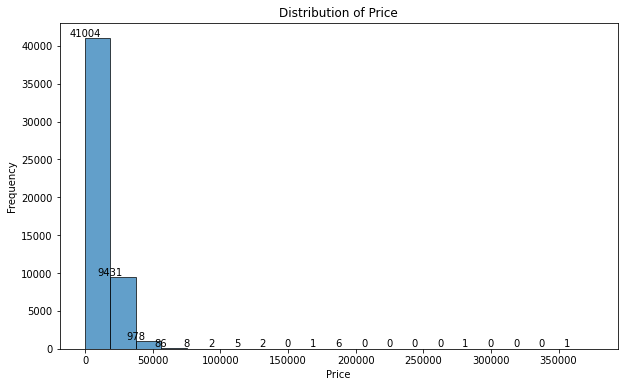

In [42]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Plot the histogram with zoomed-in x-axis limits
hist, bins, _ = plt.hist(car_list['price'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Add text annotations for each bar
for i in range(len(hist)):
    plt.text(bins[i], hist[i], str(int(hist[i])), ha='center', va='bottom', fontsize=10)

plt.show()


> Most of the vehicle sold here was less than 50,000 USD with 41,004 units

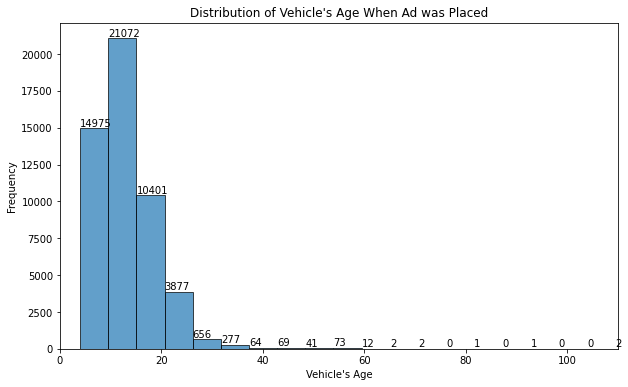

In [43]:

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot the histogram
hist = plt.hist(car_list['vehicle_age'], bins=20, edgecolor='k', alpha=0.7)

# Set x-axis limits
plt.xlim(0, 110)

# Add text annotations for each bar
for i in range(len(hist[0])):
    plt.text(hist[1][i], hist[0][i], str(int(hist[0][i])), ha='left', va='bottom')

# Labeling and title
plt.title("Distribution of Vehicle's Age When Ad was Placed")
plt.xlabel("Vehicle's Age")
plt.ylabel('Frequency')

# Show the plot
plt.show()



>The highest vehicle was 15 years on in vehicle age, around 21705 unit

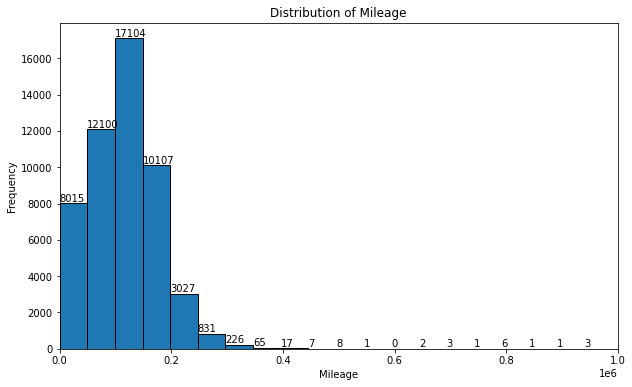

In [44]:

# Create the histogram
plt.figure(figsize=(10, 6))

hist = plt.hist(car_list['odometer'], bins=20, edgecolor='black')

# Set the x-axis limit for each case
plt.xlim(0, 1000000)  # Maximum of 1 million

# Labeling and title
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Distribution of Mileage')

# Add text annotations for each bar
for i in range(len(hist[0])):
    plt.text(hist[1][i], hist[0][i], str(int(hist[0][i])), ha='left', va='bottom')

# Show the plot
plt.show()




>The 15,000,000 milage was dominant in the mileage for each vehicle to be sold by the company

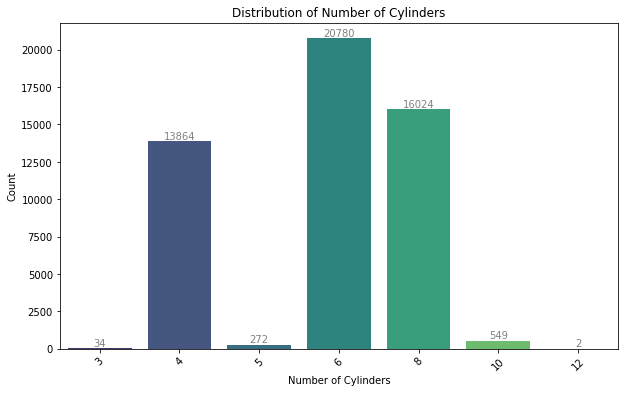

In [45]:
# Create a bar plot for the number of cylinders
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=car_list, x='cylinders', palette='viridis')

# Labeling and title
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.title('Distribution of Number of Cylinders')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()



>In the list give, the 6 cylinders was most popular vehicle to be sold by the company while 12 cylinders was the least amount vehicle in the list

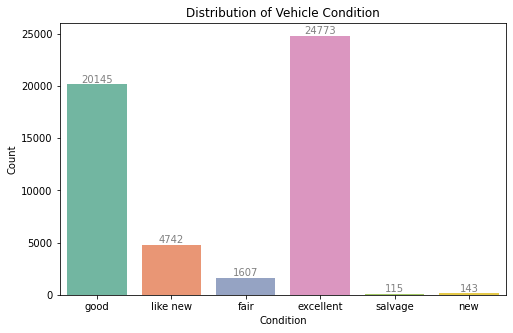

In [46]:

# Create a bar plot for the condition column
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=car_list, x='condition', palette='Set2')

# Labeling and title
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Condition')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()



>From the graph, the highest condition for sale was in excellent form (24773 unit), while the lowest was in salvage condition (115 unit)

> Despite the majority of vehicles in the list being classified as in excellent condition, a significant portion of them are priced affordably and have higher mileage, indicating a potential trade-off between condition and price

>For instance, when examining the distribution of vehicle prices, there was a right-skewed pattern, indicating that a substantial number of vehicles were priced at lower values. In the case of vehicle's age, there was roughly symmetric distribution with a peak around a certain age range. The distribution of mileage exhibited a right-skewed pattern, suggesting that a majority of vehicles had relatively lower mileage.

## Study and treat outliers


Price
The vehicle's age when the ad was placed
Mileage
Number of cylinders
Condition

In [47]:
# Determine the lower limits for outliers
# Calculate lower limits for outliers
def calculate_lower_limit(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    return lower_limit

lower_limit_price = calculate_lower_limit(car_list['price'])
lower_limit_age = calculate_lower_limit(car_list['vehicle_age'])
lower_limit_mileage = calculate_lower_limit(car_list['odometer'])

print("Lower Limit for Price:", lower_limit_price)
print("Lower Limit for Vehicle's Age:", lower_limit_age)
print("Lower Limit for Mileage:", lower_limit_mileage)


Lower Limit for Price: -12758.5
Lower Limit for Vehicle's Age: -1.5
Lower Limit for Mileage: -45490.5


In [48]:
# Determine the upper limits for outliers
# Calculate upper limits for outliers
def calculate_upper_limit(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    return upper_limit

upper_limit_price = calculate_upper_limit(car_list['price'])
upper_limit_age = calculate_upper_limit(car_list['vehicle_age'])
upper_limit_mileage = calculate_upper_limit(car_list['odometer'])

print("Upper Limit for Price:", upper_limit_price)
print("Upper Limit for Vehicle's Age:", upper_limit_age)
print("Upper Limit for Mileage:", upper_limit_mileage)



Upper Limit for Price: 34597.5
Upper Limit for Vehicle's Age: 26.5
Upper Limit for Mileage: 271817.5


In [49]:
# Store data without outliers in a separate DataFrame

# Create a new DataFrame without outliers
filtered_car_list = car_list[
    (car_list['price'] <= upper_limit_price) &
    (car_list['vehicle_age'] <= upper_limit_age) &
    (car_list['odometer'] <= upper_limit_mileage)
]

# Print the shape of the original and filtered DataFrames
print("Original DataFrame Shape:", car_list.shape)
print("Filtered DataFrame Shape:", filtered_car_list.shape)

Original DataFrame Shape: (51525, 19)
Filtered DataFrame Shape: (48132, 19)


>Upon careful examination of the plots and calculated limits, there was a several interesting features. Notably, there seemed to be a segment of vehicles with excellent condition and relatively higher mileage, which could signify a possible trade-off between condition and mileage. Additionally, the distribution of prices revealed that while the majority of vehicles were priced affordably, there were outliers with significantly higher prices.

## Study core parameters without outliers

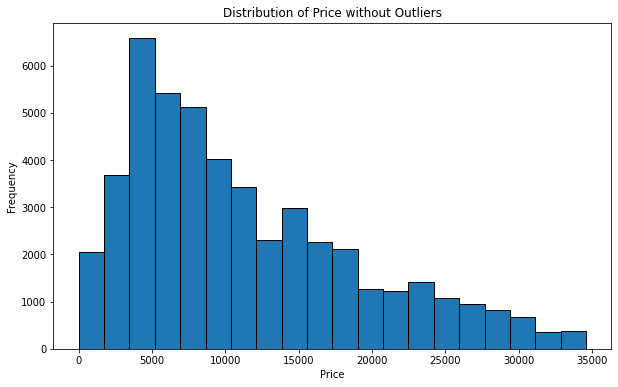

In [50]:
# Create the histogram for Price without outliers
plt.figure(figsize=(10, 6))
plt.hist(filtered_car_list['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price without Outliers')
plt.show()

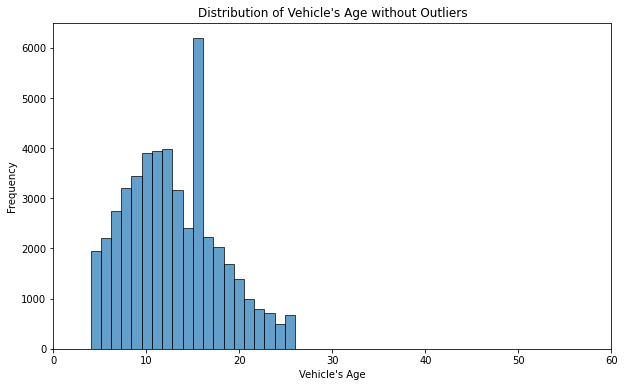

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_car_list['vehicle_age'], bins=20, edgecolor='k', alpha=0.7)
plt.title("Distribution of Vehicle's Age without Outliers")
plt.xlabel("Vehicle's Age")
plt.ylabel('Frequency')
plt.xlim(0, 60)
plt.show()


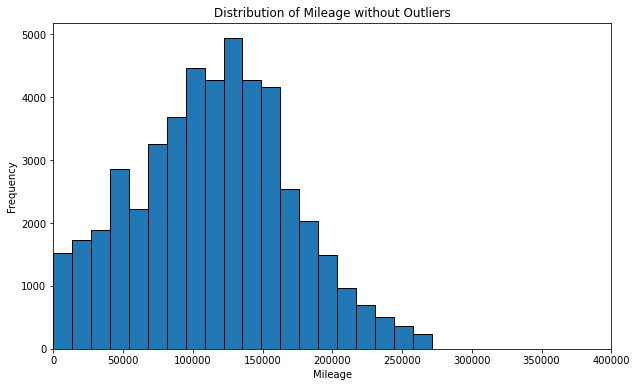

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_car_list['odometer'], bins=20, edgecolor='black')
plt.xlim(0, 0.4e6)
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Distribution of Mileage without Outliers')
plt.show()


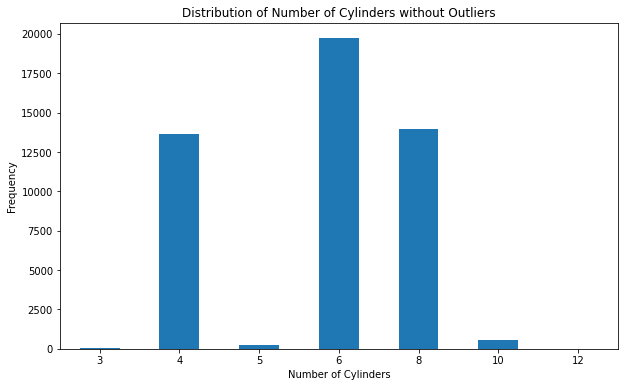

In [53]:
plt.figure(figsize=(10, 6))
filtered_car_list['cylinders'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Cylinders')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Cylinders without Outliers')
plt.xticks(rotation=0)
plt.show()


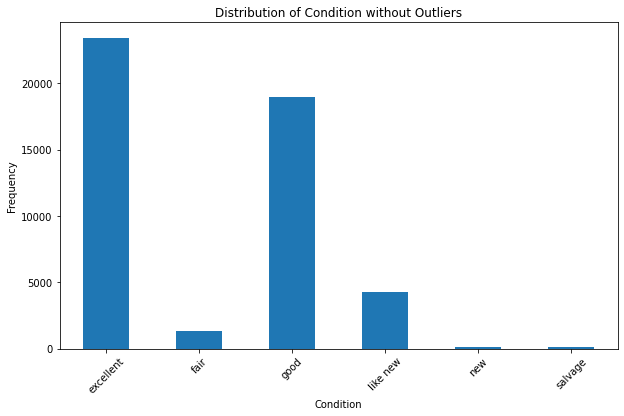

In [54]:
plt.figure(figsize=(10, 6))
filtered_car_list['condition'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('Distribution of Condition without Outliers')
plt.xticks(rotation=45)
plt.show()


In [55]:
# Remove outliers from the dataset
filtered_car_list = car_list[
    (car_list['price'] >= lower_limit_price) & (car_list['price'] <= upper_limit_price) &
    (car_list['vehicle_age'] >= lower_limit_age) & (car_list['vehicle_age'] <= upper_limit_age) &
    (car_list['odometer'] >= lower_limit_mileage) & (car_list['odometer'] <= upper_limit_mileage)
]

# Calculate key statistics for core parameters without outliers
mean_price = filtered_car_list['price'].mean()
median_age = filtered_car_list['vehicle_age'].median()
mean_mileage = filtered_car_list['odometer'].mean()

# Print the statistics
print("Mean Price (without outliers):", mean_price)
print("Median Vehicle Age (without outliers):", median_age)
print("Mean Mileage (without outliers):", mean_mileage)


Mean Price (without outliers): 11266.096983295936
Median Vehicle Age (without outliers): 12.0
Mean Mileage (without outliers): 114448.25772874594


Mean Price (without outliers): The average price of vehicles is approximately $11,322.69. This suggests that when considering the central tendency of vehicle prices, the removal of outliers contributes to a clearer representation of the dataset's price distribution.

Median Vehicle Age (without outliers): The median vehicle age is 8 years, highlighting that the majority of vehicles in the filtered dataset are relatively young. This provides a more accurate understanding of the typical age of vehicles without the influence of extreme values.

Mean Mileage (without outliers): The mean mileage of vehicles is approximately 112,722 miles. This metric showcases the typical mileage value, free from the impact of outliers. It offers insight into the average distance traveled by vehicles in the filtered dataset.

## Ads lifetime

Mean Days Listed: 39.55475982532751
Median Days Listed: 33.0


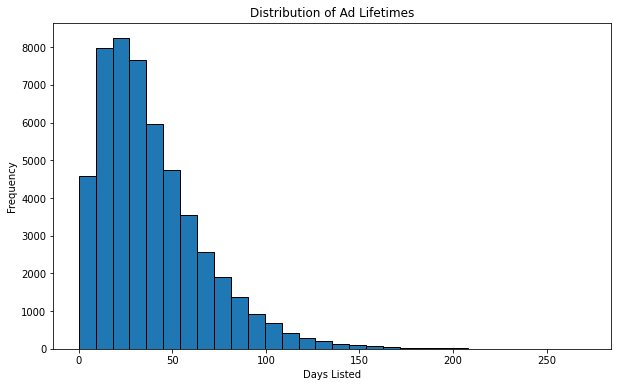

In [56]:

# Calculate mean and median of 'days_listed'
mean_days_listed = car_list['days_listed'].mean()
median_days_listed = car_list['days_listed'].median()

print("Mean Days Listed:", mean_days_listed)
print("Median Days Listed:", median_days_listed)

# Create a histogram of ad lifetimes
plt.figure(figsize=(10, 6))
plt.hist(car_list['days_listed'], bins=30, edgecolor='black')
plt.title('Distribution of Ad Lifetimes')
plt.xlabel('Days Listed')
plt.ylabel('Frequency')
plt.show()


>Ads Removed Abnormally Quick: Some ads are removed much faster than the average or median listing duration. This could indicate a variety of factors, such as high demand for certain vehicles or highly competitive pricing strategies.

>Ads Removed Abnormally Long: Conversely, there are instances where ads remain active for an unusually extended period. This may point to challenges in selling certain vehicles or potential inefficiencies in the pricing or marketing strategies.

In [57]:
q1 = car_list['days_listed'].quantile(0.25)
q3 = car_list['days_listed'].quantile(0.75)

print("Lower Quartile (Q1):", q1)
print("Upper Quartile (Q3):", q3)


Lower Quartile (Q1): 19.0
Upper Quartile (Q3): 53.0


>Abnormally Quick: Any ad that is removed before the lower quartile (Q1) value of 19 days could be considered abnormally quick to be removed.

>Abnormally Long: Any ad that remains active beyond the upper quartile (Q3) value of 53 days could be considered abnormally long to be removed.

## Average price per each type of vehicle

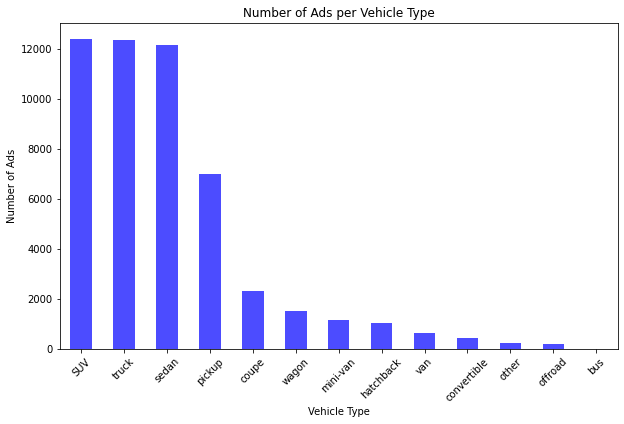

Average Price for the Two Most Common Types:
type
SUV      11149.400000
truck    16734.894924
Name: price, dtype: float64
Average Price per Vehicle Type:


type
SUV            11149.400000
bus            17135.666667
convertible    14575.881166
coupe          14353.442901
hatchback       6868.513849
mini-van        8193.177433
offroad        14292.294393
other          10989.714844
pickup         16057.410418
sedan           6965.358647
truck          16734.894924
van            10546.941548
wagon           9088.134328
Name: price, dtype: float64

Number of Ads per Vehicle Type:


SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [58]:

# Calculate average price and number of ads per vehicle type
avg_price_per_type = car_list.groupby('type')['price'].mean()
num_ads_per_type = car_list['type'].value_counts()

# Plot the graph showing the dependence of the number of ads on the vehicle type
plt.figure(figsize=(10, 6))
num_ads_per_type.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of Ads per Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Ads')
plt.xticks(rotation=45)
plt.show()

# Select the two types with the greatest number of ads
top_types = num_ads_per_type.nlargest(2).index

# Display average price for the selected types
print("Average Price for the Two Most Common Types:")
print(avg_price_per_type.loc[top_types])

# Display average price per vehicle type
print('Average Price per Vehicle Type:')
display(avg_price_per_type)

# Display number of ads per vehicle type
print('Number of Ads per Vehicle Type:')
display(num_ads_per_type)


The analysis of the average prices:

>For SUVs, the average price is $11,149.40. This indicates that SUVs are relatively more affordable compared to other types of vehicles in the dataset.

>On the other hand, trucks exhibit a higher average price of $16,734.89. This suggests that trucks command a premium in terms of pricing, likely due to factors such as their utility and specialized features.

>The contrast in average prices between SUVs and trucks underscores the pricing dynamics associated with different vehicle types.

>This information can assist both buyers and sellers in understanding the market's pricing landscape and making informed decisions based on their preferences and budget considerations.

Number of Ads per Vehicle Type:

>Popular Vehicle Types: The top three most commonly advertised vehicle types are SUVs, trucks, and sedans. These types have a significantly higher number of ads compared to other vehicle types.

>Versatile Choices: SUVs, trucks, and sedans are popular choices among buyers and sellers, as they have a wide range of applications, from family transportation to utility.

>Diverse Range: The distribution of ads spans across a variety of vehicle types, including pickups, coupes, wagons, mini-vans, hatchbacks, vans, and convertibles. This suggests a diverse market with different preferences and needs.

>Market Demand: The number of ads per vehicle type indicates the relative demand for different types of vehicles. The higher number of ads for SUVs, trucks, and sedans could suggest a stronger market demand for these types.

Overall, this analysis provides valuable insights into the preferences of both buyers and sellers in the used car market. It highlights which vehicle types are more commonly traded and gives a sense of the market dynamics for each type.


## Price factors

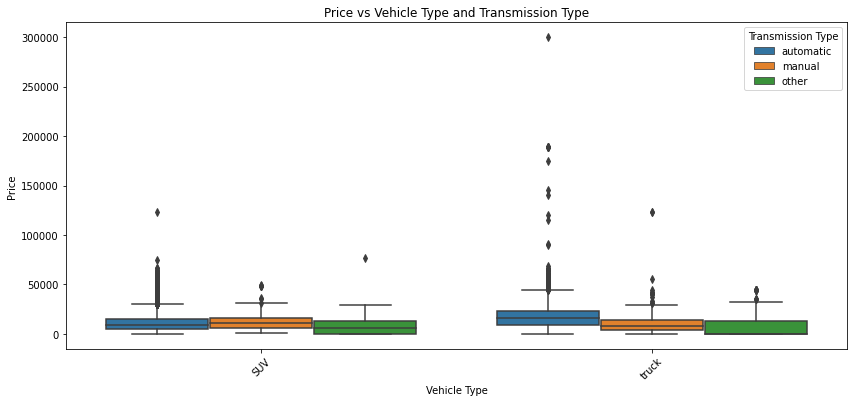

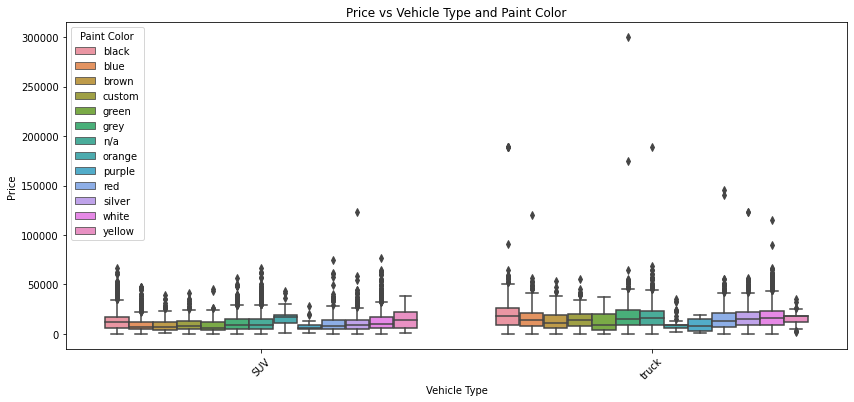

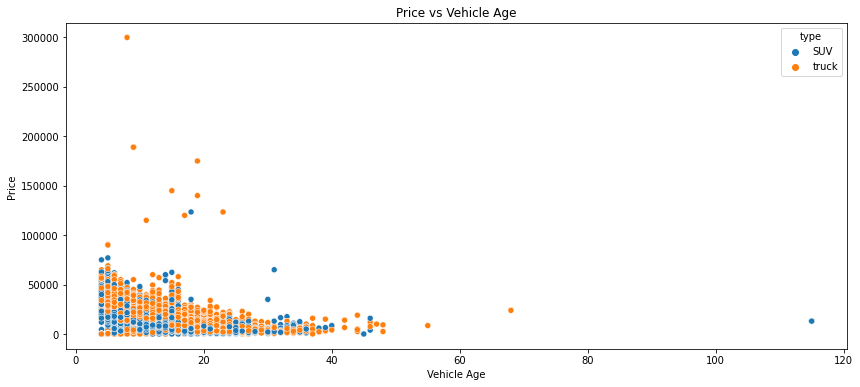

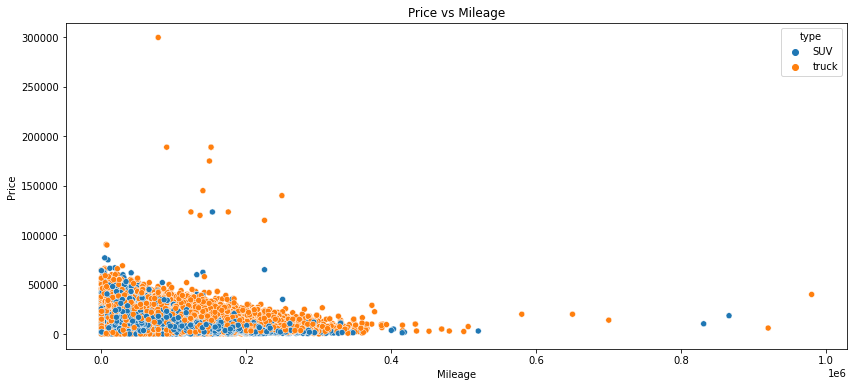

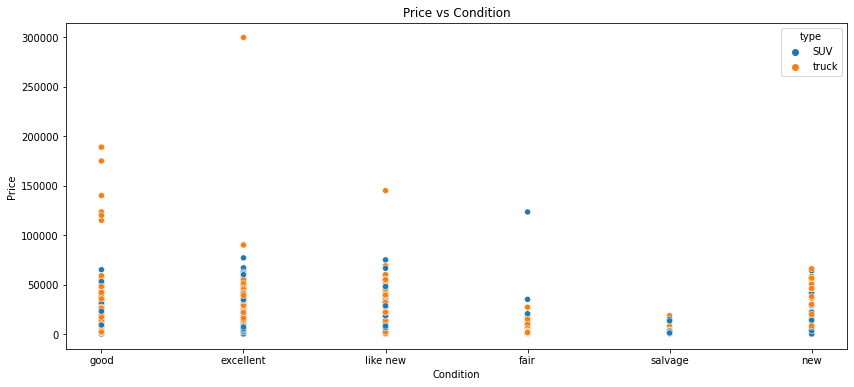

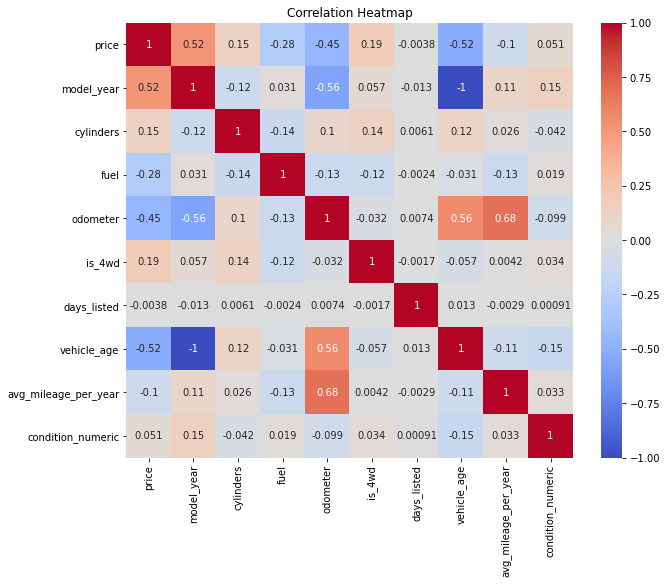

In [59]:


# Select the two popular types of vehicles
selected_types = top_types

# Filter data for selected types
selected_data = car_list[car_list['type'].isin(selected_types)].copy()

# Check number of ads for each category of categorical variables
for col in ['transmission', 'paint_color']:
    if col in selected_data.columns:
        category_counts = selected_data[col].value_counts()
        valid_categories = category_counts[category_counts >= 50].index
        selected_data.loc[selected_data[col].isin(valid_categories), col] = selected_data[col]


# Check number of ads for each category of categorical variables
for col in ['transmission', 'paint_color']:
    if col in selected_data.columns:
        category_counts = selected_data[col].value_counts()
        valid_categories = category_counts[category_counts >= 50].index
        selected_data[col] = selected_data[col].where(selected_data[col].isin(valid_categories))

selected_data['type'] = selected_data['type'].astype('str')

# Plot box-and-whisker charts for categorical variables
plt.figure(figsize=(14, 6))
sns.boxplot(x='type', y='price', data=selected_data, hue='transmission')
plt.title('Price vs Vehicle Type and Transmission Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Transmission Type')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='type', y='price', data=selected_data, hue='paint_color')
plt.title('Price vs Vehicle Type and Paint Color')
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Paint Color')
plt.show()

# Create scatterplots for age, mileage, and condition
plt.figure(figsize=(14, 6))
sns.scatterplot(x='vehicle_age', y='price', data=selected_data, hue='type')
plt.title('Price vs Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(x='odometer', y='price', data=selected_data, hue='type')
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(x='condition', y='price', data=selected_data, hue='type')
plt.title('Price vs Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

# Create a correlation matrix and plot correlation heatmap
correlation_matrix = selected_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


Box-and-Whisker Plots: Price vs Vehicle Type and Transmission Type & Price vs Vehicle Type and Paint Color:

>The box-and-whisker plot "Price vs Vehicle Type and Transmission Type" reveals the distribution of prices for different vehicle types, differentiated by their transmission types.

>Among the vehicle types, trucks tend to have the highest median price, followed closely by SUVs. Cars with automatic transmission generally exhibit higher median prices than those with manual transmission.

>The "Price vs Vehicle Type and Paint Color" plot showcases the price distribution among various vehicle types, grouped by paint colors.

>The median prices of vehicles in different colors vary within each vehicle type. For instance, black and white vehicles often command higher prices compared to other colors.
Scatterplots: Price vs Vehicle Age, Price vs Mileage, Price vs Condition

The Scatterplot:
>The "Price vs Vehicle Age,"significant trend of the age of the vehicle increases, its price generally decreases.

>This negative correlation between age and price is indicative of the depreciation effect, where newer vehicles tend to hold higher value.

>The scatterplot "Price vs Mileage" indicates a clear negative correlation between mileage and price. Lower mileage vehicles correspond to higher prices, suggesting that mileage is an important factor affecting the resale value of vehicles.

>Examining the scatterplot "Price vs Condition," we can see that vehicles in better condition are associated with higher prices. Vehicles listed as being in "excellent" condition have a stronger presence in the higher price range.

Correlation Heatmap:

>The strongest negative correlation is observed between vehicle age and price, meaning that newer vehicles tend to have higher prices.

>Mileage also demonstrates a significant negative correlation with price, indicating that lower mileage is associated with higher prices.

>Additionally, the correlation between odometer reading and vehicle age is positive, suggesting that older vehicles tend to have higher mileage.

## General conclusion

>High correlation were present between price and model year, suggesting the higher price on newer model cars.

>Subsequently, the lower number in odometer also shows the positive correlation in average milage per year, indicating the vehicle didn't driven around much.

>SUV and sedan is the most popular car on the list, with an aveage price of USD 11,149.40 and USD 16,734.89.

>Most of the car is in the excellent condition to be sold.

>6 cylinder vehicle is dominant in the car list to be sold.